In [7]:
# Netflix Content Strategy Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset - Fixed encoding parameter placement
df = pd.read_csv(r"D:\Doni Study\DataPortfolio\Python_Projects\netflix_analysis\netflix_titles.csv", encoding='latin1')

# Quick overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (8809, 26)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

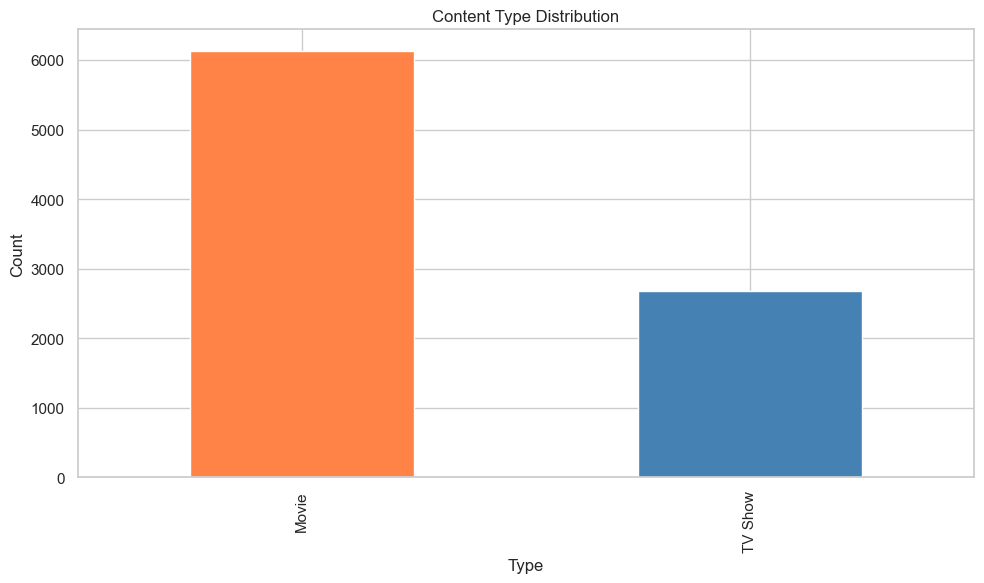

In [12]:
# Count content types
type_counts = df['type'].value_counts()

# Plot
type_counts.plot(kind='bar', color=['#FF8347', '#4681B4'], title='Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(r"D:\Doni Study\DataPortfolio\Python_Projects\netflix_analysis\content_type.png")
plt.show()

“Netflix’s catalog is heavily skewed toward movies, suggesting a focus on quick-consumption content. This may reflect global licensing ease or viewer preference for standalone titles.”

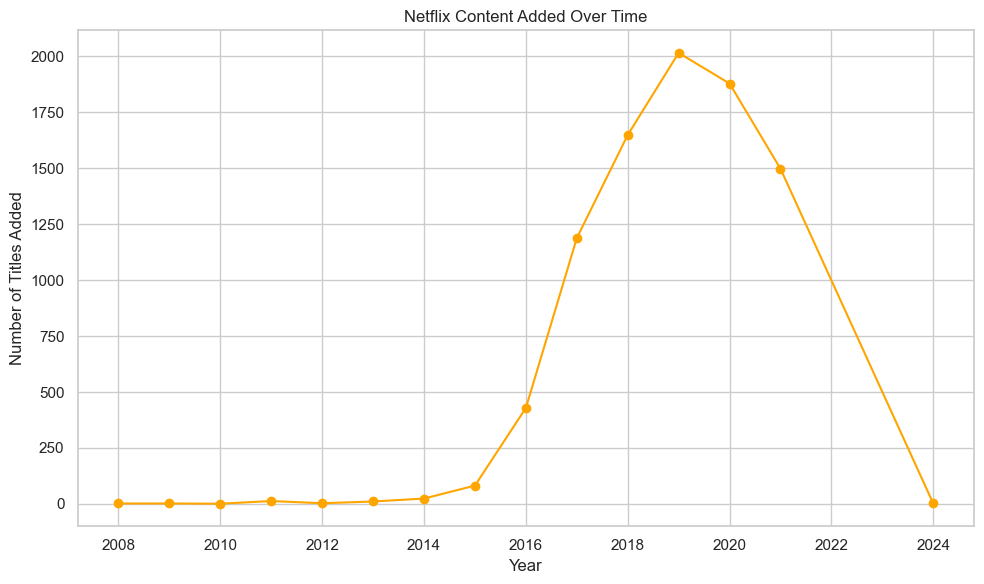

In [16]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count titles per year
yearly_counts = df['year_added'].value_counts().sort_index()

# Plot
yearly_counts.plot(kind='line', marker='o', color='orange', title='Netflix Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.savefig(r"D:\Doni Study\DataPortfolio\Python_Projects\netflix_analysis\yearly_trend.png")
plt.show()

“Netflix’s content additions peaked around 2018–2019, reflecting aggressive global expansion. Post-2020 trends show a shift toward curated growth, possibly due to production constraints and strategic licensing.”

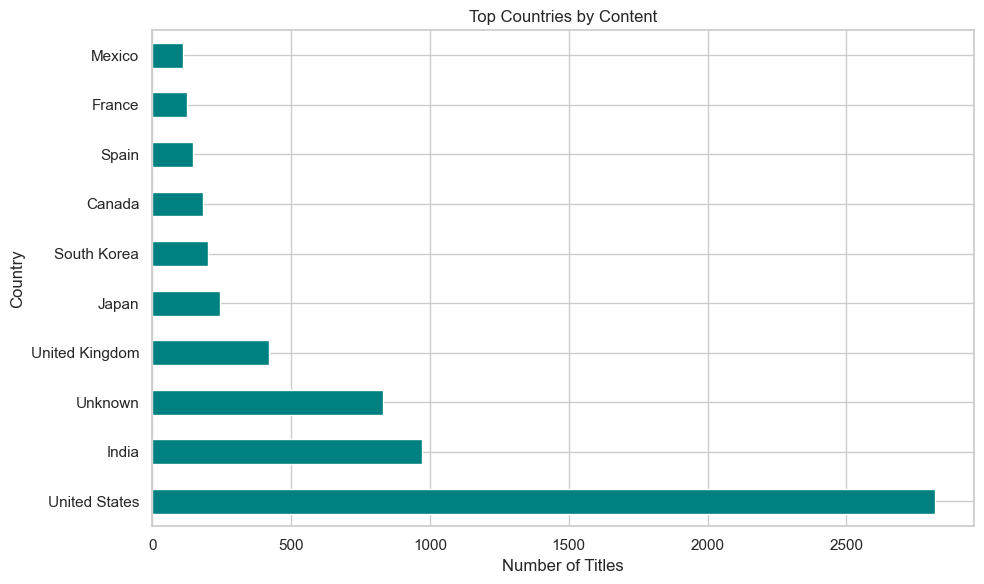

In [18]:
# Handle missing values in 'country'
df['country'] = df['country'].fillna('Unknown')

# Count top 10 countries
top_countries = df['country'].value_counts().head(10)

# Plot
top_countries.plot(kind='barh', color='teal', title='Top Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(r"D:\Doni Study\DataPortfolio\Python_Projects\netflix_analysis\top_countries.png")
plt.show()

“Netflix’s catalog is heavily influenced by U.S. and Indian content, reflecting strong production pipelines and viewer demand. This insight helps content strategists prioritize licensing and localization efforts.”


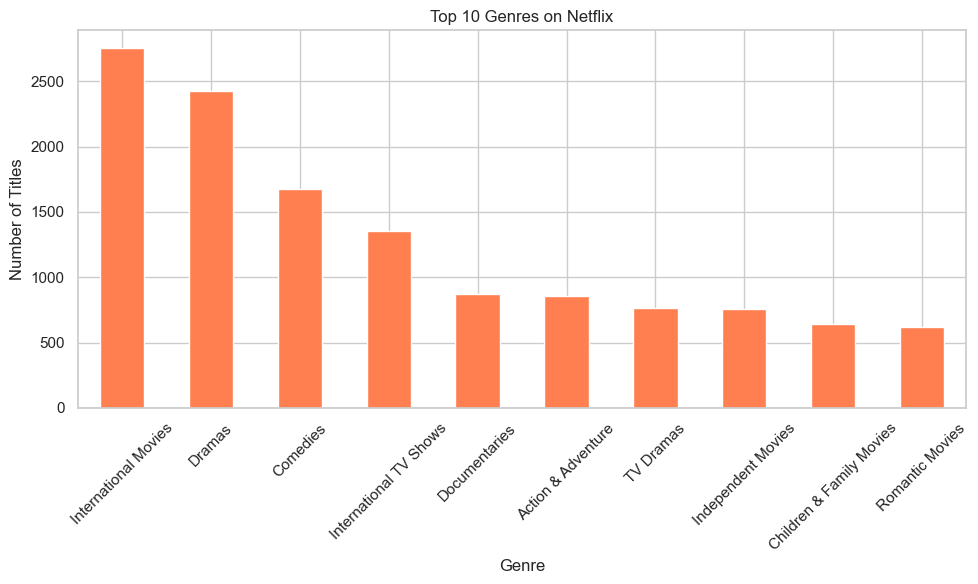

In [19]:
# Split genres and count frequency
genre_counts = df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

# Plot
genre_counts.plot(kind='bar', color='coral', title='Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"D:\Doni Study\DataPortfolio\Python_Projects\netflix_analysis\top_genres.png")
plt.show()

“Dramas and comedies dominate Netflix’s catalog, reflecting a global preference for emotionally engaging and easily localized content. This insight helps guide content acquisition and regional marketing strategies.”